[nltk_data] Downloading package punkt to /home/maria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/maria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


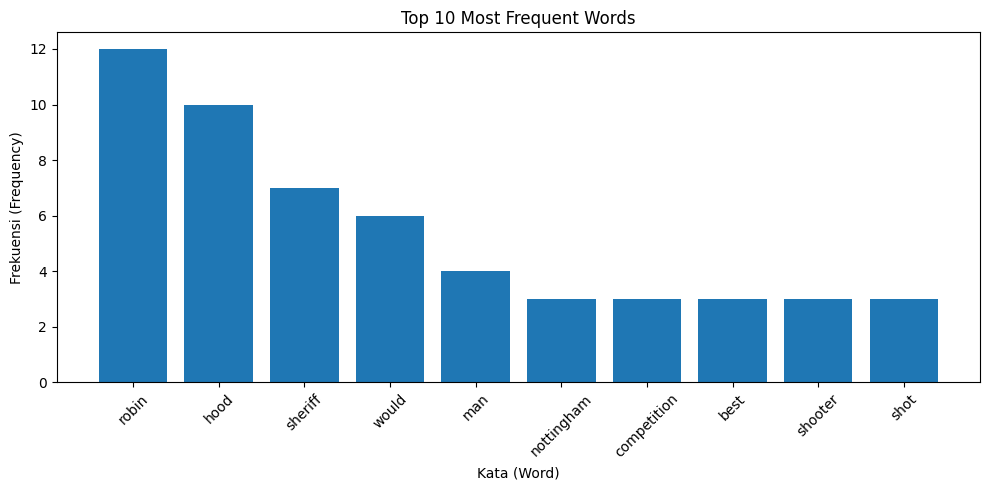

Sentiment: Positive


In [1]:
import pandas as pd  # Not used in this specific code, but may be helpful for future analysis
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Comment out if error persists
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import Counter  # Import Counter for counting word frequencies


# Ensure necessary Nltk data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text from data.txt
with open('data.txt', 'r') as file:
    text = file.read()

# Check if text is empty
if not text:
    print("Error: Text file is empty.")
    exit()

# Preprocess the text (remove basic punctuation, lowercase, alphanumeric characters only)
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char == ' '])  # Keep alphanumeric and spaces
    return text

# Preprocess the text
text = preprocess_text(text)

# Tokenize the text (split into words)
tokens = word_tokenize(text)

# Remove stop words (common words like "the", "a")
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Get the top 10 most frequent words
word_counts = Counter(filtered_tokens)
top_10_words = word_counts.most_common(10)
top_10_words = [word for word, count in top_10_words]  # Extract words from tuples

# Create a list of word frequencies for the top 10
top_10_frequencies = [word_counts[word] for word in top_10_words]

# Use map to create a list of word frequencies (fixed)
word_frequencies = list(map(word_counts.get, filtered_tokens))  # Use filtered_tokens

plt.figure(figsize=(10, 5))
plt.bar(top_10_words, top_10_frequencies)  # Plot only the top 10
plt.xlabel('Kata (Word)')  # Use English label for wider audience
plt.ylabel('Frekuensi (Frequency)')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the sentiment of the text using TextBlob
blob = TextBlob(text)
sentiment = blob.sentiment.polarity

if sentiment > 0:
    print("Sentiment: Positive")
elif sentiment < 0:
    print("Sentiment: Negative")
else:
    print("Sentiment: Neutral")
